In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

Source Destination     Source Coordinates Destination Coordinates  \
0       Agra       Delhi  27.1752554,78.0098161   28.6273928,77.1716954   
1       Agra      Jaipur  27.1752554,78.0098161   26.9154576,75.8189817   
2  Ahmedabad    Amritsar  23.0216238,72.5797068   31.6343083,74.8736788   
3  Ahmedabad     Belgaum  23.0216238,72.5797068   15.8572666,74.5069343   
4  Ahmedabad   Bhavnagar  23.0216238,72.5797068   21.7718836,72.1416449   

   Total Distance (m)  Total Duration (seconds)  Onroad Duration (seconds)  \
0              209076                     16712                      14513   
1              398610                     27690                      21894   
2             1378073                    107525                      73187   
3             1002238                     72132                      52346   
4              174370                     13090                      11624   

   Charging Duration (seconds)  Number of Stops  Distance (km)  
0                         2199                1        209.076  
1                         5796                2        398.610  
2                        34338               11       1378.073  
3                        19786                7       1002.238  
4                         1466                1        174.370

In [4]:
# Convert distance in meters to kilometers
df['Distance (km)'] = df['Total Distance (m)'] / 1000

# Save the modified DataFrame to a new CSV file
df.to_csv('modified_data.csv', index=False)


In [5]:
df.head()

Source Destination     Source Coordinates Destination Coordinates  \
0       Agra       Delhi  27.1752554,78.0098161   28.6273928,77.1716954   
1       Agra      Jaipur  27.1752554,78.0098161   26.9154576,75.8189817   
2  Ahmedabad    Amritsar  23.0216238,72.5797068   31.6343083,74.8736788   
3  Ahmedabad     Belgaum  23.0216238,72.5797068   15.8572666,74.5069343   
4  Ahmedabad   Bhavnagar  23.0216238,72.5797068   21.7718836,72.1416449   

   Total Distance (m)  Total Duration (seconds)  Onroad Duration (seconds)  \
0              209076                     16712                      14513   
1              398610                     27690                      21894   
2             1378073                    107525                      73187   
3             1002238                     72132                      52346   
4              174370                     13090                      11624   

   Charging Duration (seconds)  Number of Stops  Distance (km)  
0                         2199                1        209.076  
1                         5796                2        398.610  
2                        34338               11       1378.073  
3                        19786                7       1002.238  
4                         1466                1        174.370

In [6]:
# Load the original dataset from a CSV file
df = pd.read_csv('modified_data.csv')

# Convert seconds to hours, minutes, and seconds for 'Total Duration'
df['Total Hours'] = df['Total Duration (seconds)'] // 3600
df['Total Minutes'] = (df['Total Duration (seconds)'] % 3600) // 60
df['Total Seconds'] = df['Total Duration (seconds)'] % 60

# Convert seconds to hours, minutes, and seconds for 'Charging Duration'
df['Charging Hours'] = df['Charging Duration (seconds)'] // 3600
df['Charging Minutes'] = (df['Charging Duration (seconds)'] % 3600) // 60
df['Charging Seconds'] = df['Charging Duration (seconds)'] % 60

# Convert seconds to hours, minutes, and seconds for 'Onroad Duration'
df['Onroad Hours'] = df['Onroad Duration (seconds)'] // 3600
df['Onroad Minutes'] = (df['Onroad Duration (seconds)'] % 3600) // 60
df['Onroad Seconds'] = df['Onroad Duration (seconds)'] % 60

# Save the modified DataFrame to a new CSV file
df.to_csv('modified_dataset.csv', index=False)

In [7]:
df.head()

Source Destination     Source Coordinates Destination Coordinates  \
0       Agra       Delhi  27.1752554,78.0098161   28.6273928,77.1716954   
1       Agra      Jaipur  27.1752554,78.0098161   26.9154576,75.8189817   
2  Ahmedabad    Amritsar  23.0216238,72.5797068   31.6343083,74.8736788   
3  Ahmedabad     Belgaum  23.0216238,72.5797068   15.8572666,74.5069343   
4  Ahmedabad   Bhavnagar  23.0216238,72.5797068   21.7718836,72.1416449   

   Total Distance (m)  Total Duration (seconds)  Onroad Duration (seconds)  \
0              209076                     16712                      14513   
1              398610                     27690                      21894   
2             1378073                    107525                      73187   
3             1002238                     72132                      52346   
4              174370                     13090                      11624   

   Charging Duration (seconds)  Number of Stops  Distance (km)  Total Hours  \
0                         2199                1        209.076            4   
1                         5796                2        398.610            7   
2                        34338               11       1378.073           29   
3                        19786                7       1002.238           20   
4                         1466                1        174.370            3   

   Total Minutes  Total Seconds  Charging Hours  Charging Minutes  \
0             38             32               0                36   
1             41             30               1                36   
2             52              5               9                32   
3              2             12               5                29   
4             38             10               0                24   

   Charging Seconds  Onroad Hours  Onroad Minutes  Onroad Seconds  
0                39             4               1              53  
1                36             6               4              54  
2                18            20              19              47  
3                46            14              32              26  
4                26             3              13              44

In [8]:
# Calculate the Price
df['Price'] = df['Distance (km)'] * 1 + df['Number of Stops'] * 231

# Save the updated DataFrame to the modified CSV file
df.to_csv('modified_dataset.csv', index=False)

In [9]:
df.head()

Source Destination     Source Coordinates Destination Coordinates  \
0       Agra       Delhi  27.1752554,78.0098161   28.6273928,77.1716954   
1       Agra      Jaipur  27.1752554,78.0098161   26.9154576,75.8189817   
2  Ahmedabad    Amritsar  23.0216238,72.5797068   31.6343083,74.8736788   
3  Ahmedabad     Belgaum  23.0216238,72.5797068   15.8572666,74.5069343   
4  Ahmedabad   Bhavnagar  23.0216238,72.5797068   21.7718836,72.1416449   

   Total Distance (m)  Total Duration (seconds)  Onroad Duration (seconds)  \
0              209076                     16712                      14513   
1              398610                     27690                      21894   
2             1378073                    107525                      73187   
3             1002238                     72132                      52346   
4              174370                     13090                      11624   

   Charging Duration (seconds)  Number of Stops  Distance (km)  Total Hours  \
0                         2199                1        209.076            4   
1                         5796                2        398.610            7   
2                        34338               11       1378.073           29   
3                        19786                7       1002.238           20   
4                         1466                1        174.370            3   

   Total Minutes  Total Seconds  Charging Hours  Charging Minutes  \
0             38             32               0                36   
1             41             30               1                36   
2             52              5               9                32   
3              2             12               5                29   
4             38             10               0                24   

   Charging Seconds  Onroad Hours  Onroad Minutes  Onroad Seconds     Price  
0                39             4               1              53   440.076  
1                36             6               4              54   860.610  
2                18            20              19              47  3919.073  
3                46            14              32              26  2619.238  
4                26             3              13              44   405.370

In [10]:
df.isnull().sum()

Source                         0
Destination                    0
Source Coordinates             0
Destination Coordinates        0
Total Distance (m)             0
Total Duration (seconds)       0
Onroad Duration (seconds)      0
Charging Duration (seconds)    0
Number of Stops                0
Distance (km)                  0
Total Hours                    0
Total Minutes                  0
Total Seconds                  0
Charging Hours                 0
Charging Minutes               0
Charging Seconds               0
Onroad Hours                   0
Onroad Minutes                 0
Onroad Seconds                 0
Price                          0
dtype: int64

In [11]:
df["Source"].value_counts()

Bengaluru             39
Hyderabad             39
Mumbai                36
Delhi                 36
Chennai               34
Ahmedabad             27
Kolkata               22
Kochi                 22
Indore                19
Pune                  18
Jaipur                15
Goa                   15
Nagpur                13
Bhopal                13
Bhubaneswar           13
Chandigarh            11
Kannur                11
Raipur                11
Coimbatore            10
Tirupati              10
Dehradun               9
Mangalore              9
Hubli                  9
Ranchi                 8
Amritsar               8
Jammu                  7
Belgaum                7
Udaipur                7
Mysore                 7
Vadodara               7
Jodhpur                6
Thiruvananthapuram     6
Calicut                6
Port Blair             6
Rajahmundry            5
Tiruchirappalli        5
Kadapa                 4
Madurai                4
Rajkot                 3
Kolhapur               3


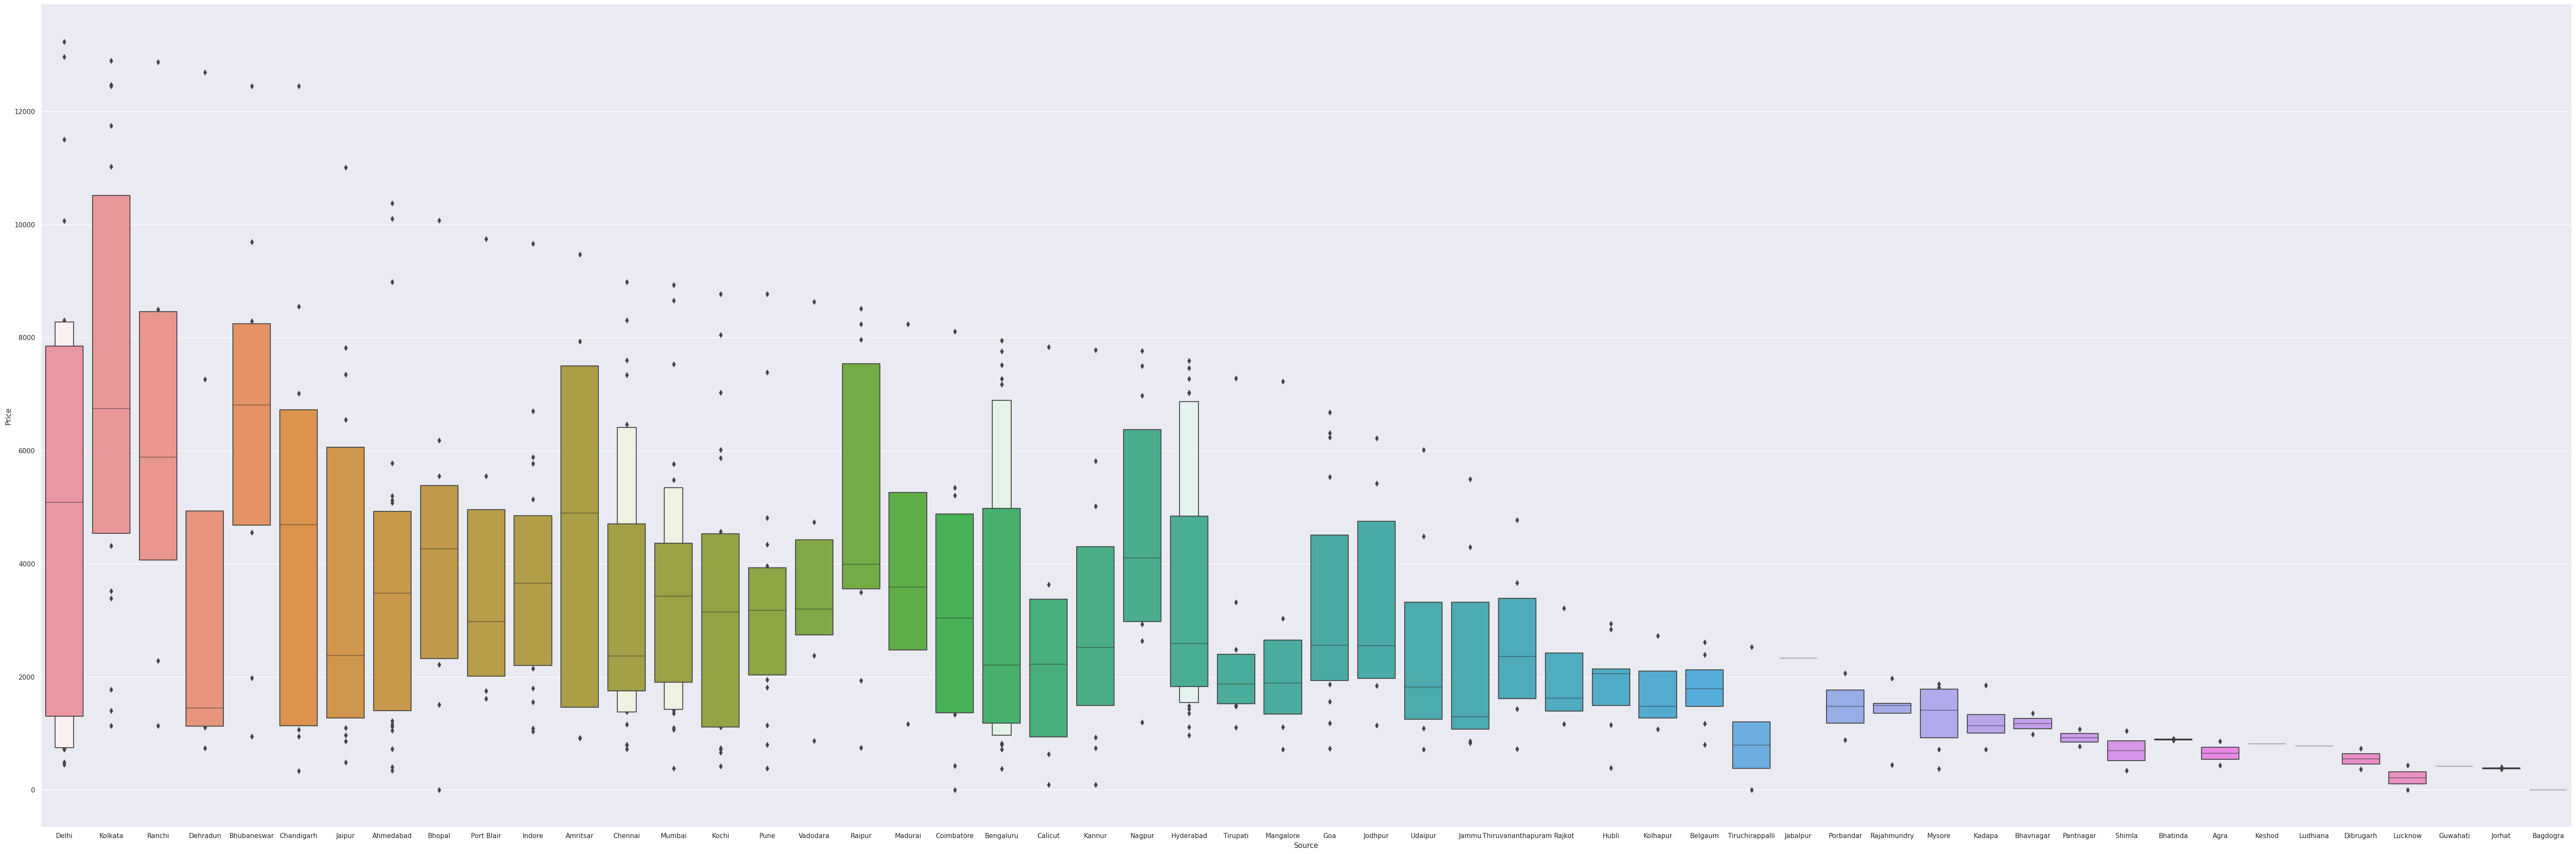

In [12]:
sns.catplot(y = "Price", x= "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 20, aspect = 3)

In [13]:
# performing OneHotEncoding on Source since it's nominal categorical data
source =df[["Source"]]
source =pd.get_dummies(source, drop_first=True)
source.head()

Source_Ahmedabad  Source_Amritsar  Source_Bagdogra  Source_Belgaum  \
0                 0                0                0               0   
1                 0                0                0               0   
2                 1                0                0               0   
3                 1                0                0               0   
4                 1                0                0               0   

   Source_Bengaluru  Source_Bhatinda  Source_Bhavnagar  Source_Bhopal  \
0                 0                0                 0              0   
1                 0                0                 0              0   
2                 0                0                 0              0   
3                 0                0                 0              0   
4                 0                0                 0              0   

   Source_Bhubaneswar  Source_Calicut  ...  Source_Raipur  Source_Rajahmundry  \
0                   0               0  ...              0                   0   
1                   0               0  ...              0                   0   
2                   0               0  ...              0                   0   
3                   0               0  ...              0                   0   
4                   0               0  ...              0                   0   

   Source_Rajkot  Source_Ranchi  Source_Shimla  Source_Thiruvananthapuram  \
0              0              0              0                          0   
1              0              0              0                          0   
2              0              0              0                          0   
3              0              0              0                          0   
4              0              0              0                          0   

   Source_Tiruchirappalli  Source_Tirupati  Source_Udaipur  Source_Vadodara  
0                       0                0               0                0  
1                       0                0               0                0  
2                       0                0               0                0  
3                       0                0               0                0  
4                       0                0               0                0  

[5 rows x 53 columns]

In [14]:
df["Destination"].value_counts()

Mumbai                37
Delhi                 36
Hyderabad             36
Chennai               33
Ahmedabad             28
Kochi                 22
Kolkata               21
Pune                  20
Jaipur                17
Goa                   16
Nagpur                15
Bengaluru             15
Chandigarh            13
Kannur                12
Visakhapatnam         12
Bhubaneswar           12
Raipur                11
Ranchi                10
Amritsar              10
Hubli                 10
Dehradun              10
Coimbatore            10
Mangalore             10
Udaipur               10
Vadodara              10
Tirupati               9
Belgaum                9
Madurai                7
Mysore                 7
Jodhpur                7
Jammu                  7
Calicut                7
Gwalior                6
Port Blair             6
Vijayawada             6
Thiruvananthapuram     6
Tiruchirappalli        5
Kolhapur               4
Agra                   4
Rajkot                 4


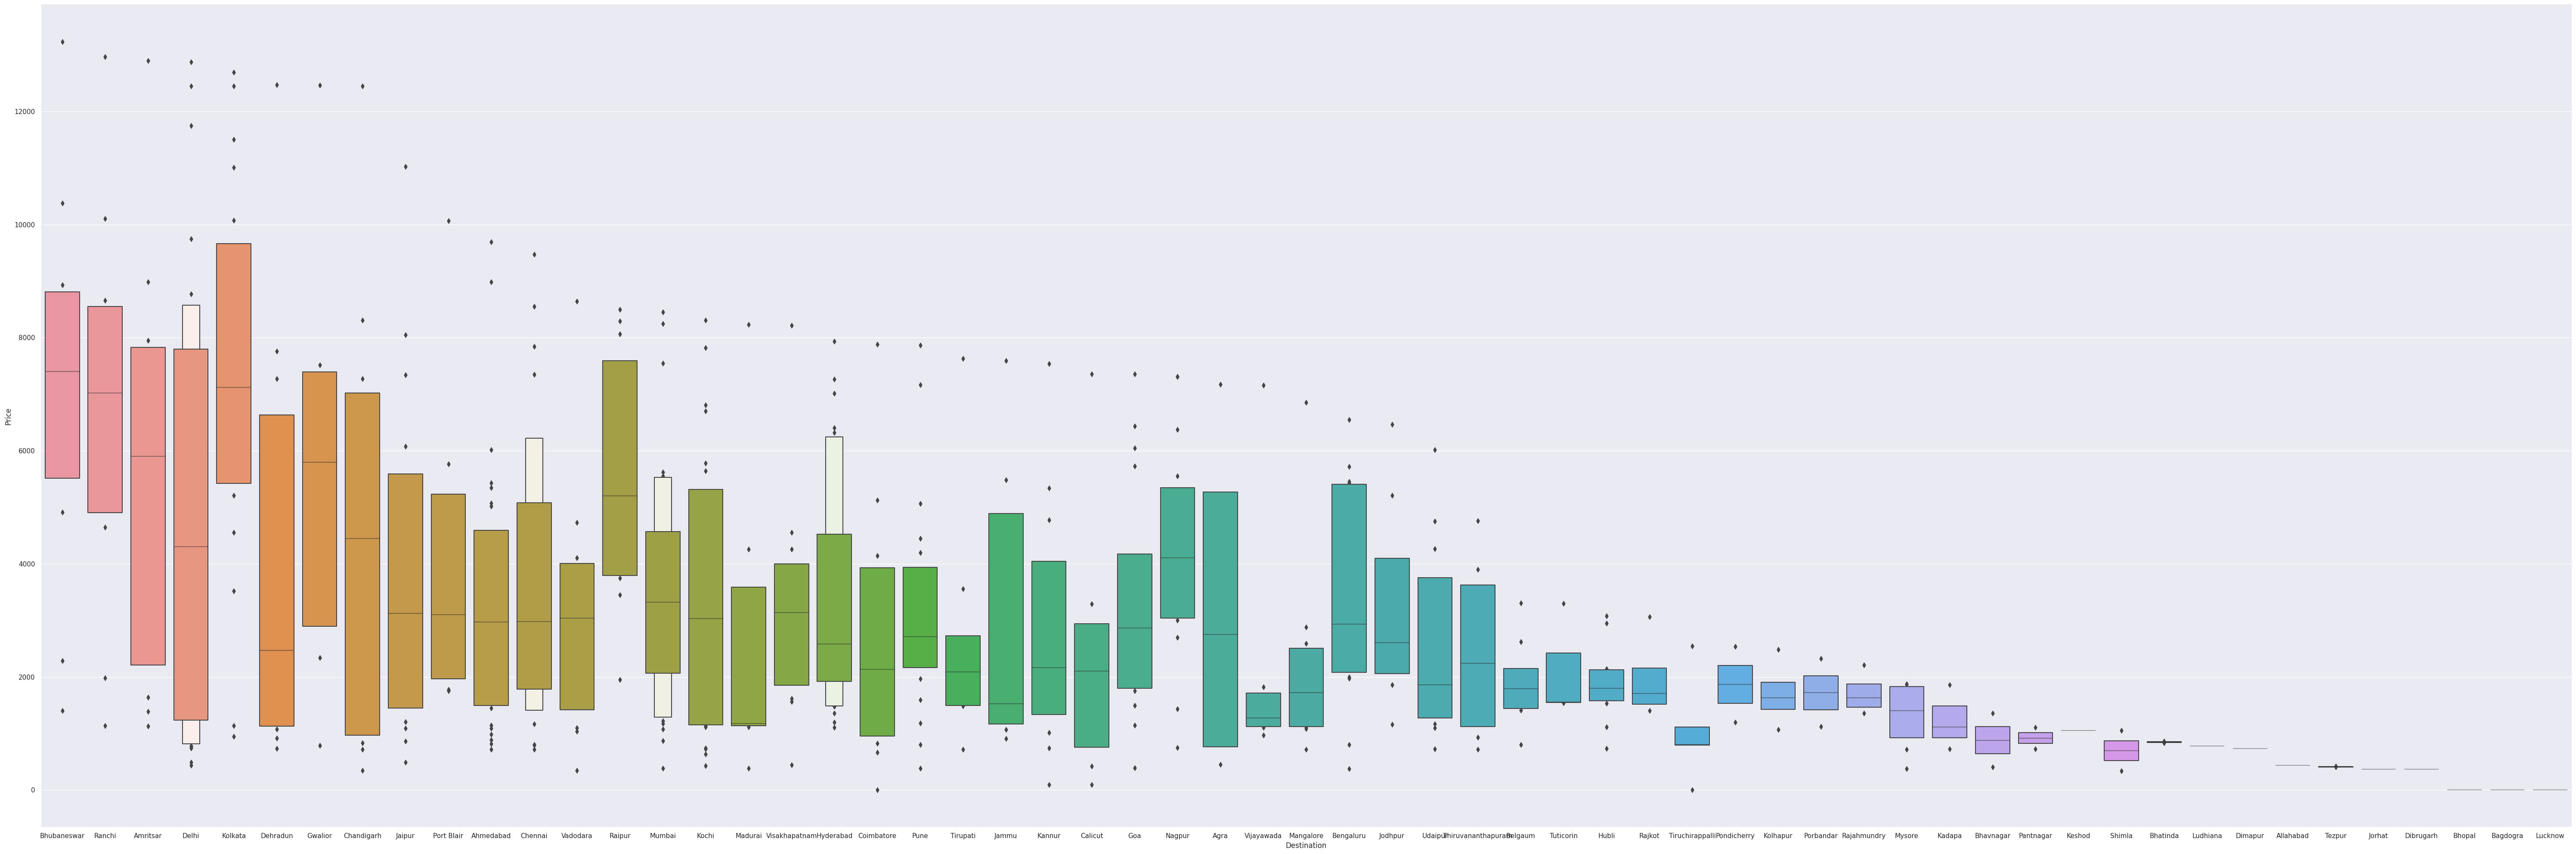

In [15]:
# destination vs price
sns.catplot(y = "Price", x= "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 20, aspect =3)

In [16]:
# performing OneHotEncoding on Destination since it's nominal categorical data
destination = df[["Destination"]]
destination = pd.get_dummies(destination, drop_first=True)
destination.head()

Destination_Ahmedabad  Destination_Allahabad  Destination_Amritsar  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     1   
3                      0                      0                     0   
4                      0                      0                     0   

   Destination_Bagdogra  Destination_Belgaum  Destination_Bengaluru  \
0                     0                    0                      0   
1                     0                    0                      0   
2                     0                    0                      0   
3                     0                    1                      0   
4                     0                    0                      0   

   Destination_Bhatinda  Destination_Bhavnagar  Destination_Bhopal  \
0                     0                      0                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   0   
4                     0                      1                   0   

   Destination_Bhubaneswar  ...  Destination_Shimla  Destination_Tezpur  \
0                        0  ...                   0                   0   
1                        0  ...                   0                   0   
2                        0  ...                   0                   0   
3                        0  ...                   0                   0   
4                        0  ...                   0                   0   

   Destination_Thiruvananthapuram  Destination_Tiruchirappalli  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   Destination_Tirupati  Destination_Tuticorin  Destination_Udaipur  \
0                     0                      0                    0   
1                     0                      0                    0   
2                     0                      0                    0   
3                     0                      0                    0   
4                     0                      0                    0   

   Destination_Vadodara  Destination_Vijayawada  Destination_Visakhapatnam  
0                     0                       0                          0  
1                     0                       0                          0  
2                     0                       0                          0  
3                     0                       0                          0  
4                     0                       0                          0  

[5 rows x 58 columns]

In [17]:
# total stops
print(df["Number of Stops"].value_counts())
df["Number of Stops"].unique()

3     54
2     50
4     47
5     43
7     37
6     37
1     26
8     26
9     25
12    25
10    24
11    22
13    17
14    15
21    13
20    11
15    11
16    10
17    10
22    10
18     9
23     8
0      7
19     6
24     4
28     4
25     4
29     4
27     2
30     1
26     1
Name: Number of Stops, dtype: int64


array([ 1,  2, 11,  7, 22, 10, 14,  8,  6, 12,  3, 13, 16, 18,  4, 21, 27,
       23,  0,  5, 20, 19, 17,  9, 15, 24, 28, 25, 29, 30, 26])

In [18]:
final_df = pd.concat([df,source,destination], axis=1).reset_index(drop = True)

In [19]:
final_df

Source Destination     Source Coordinates  \
0         Agra       Delhi  27.1752554,78.0098161   
1         Agra      Jaipur  27.1752554,78.0098161   
2    Ahmedabad    Amritsar  23.0216238,72.5797068   
3    Ahmedabad     Belgaum  23.0216238,72.5797068   
4    Ahmedabad   Bhavnagar  23.0216238,72.5797068   
..         ...         ...                    ...   
558   Vadodara   Hyderabad  22.2973142,73.1942567   
559   Vadodara      Jaipur  22.2973142,73.1942567   
560   Vadodara     Kolkata  22.2973142,73.1942567   
561   Vadodara      Mumbai  22.2973142,73.1942567   
562   Vadodara      Nagpur  22.2973142,73.1942567   

           Destination Coordinates  Total Distance (m)  \
0            28.6273928,77.1716954              209076   
1            26.9154576,75.8189817              398610   
2            31.6343083,74.8736788             1378073   
3            15.8572666,74.5069343             1002238   
4            21.7718836,72.1416449              174370   
..                             ...                 ...   
558           17.360589,78.4740613             1120352   
559          26.9154576,75.8189817              764195   
560          22.5726459,88.3638953             4707090   
561  19.08157715,72.88662753964906              410472   
562          21.1498134,79.0820556             1566239   

     Total Duration (seconds)  Onroad Duration (seconds)  \
0                       16712                      14513   
1                       27690                      21894   
2                      107525                      73187   
3                       72132                      52346   
4                       13090                      11624   
..                        ...                        ...   
558                     86983                      60072   
559                     64251                      42195   
560                    403457                     357466   
561                     30554                      22792   
562                    121913                      81587   

     Charging Duration (seconds)  Number of Stops  Distance (km)  ...  \
0                           2199                1        209.076  ...   
1                           5796                2        398.610  ...   
2                          34338               11       1378.073  ...   
3                          19786                7       1002.238  ...   
4                           1466                1        174.370  ...   
..                           ...              ...            ...  ...   
558                        26911                9       1120.352  ...   
559                        22056                7        764.195  ...   
560                        45991               17       4707.090  ...   
561                         7762                2        410.472  ...   
562                        40326               11       1566.239  ...   

     Destination_Shimla  Destination_Tezpur  Destination_Thiruvananthapuram  \
0                     0                   0                               0   
1                     0                   0                               0   
2                     0                   0                               0   
3                     0                   0                               0   
4                     0                   0                               0   
..                  ...                 ...                             ...   
558                   0                   0                               0   
559                   0                   0                               0   
560                   0                   0                               0   
561                   0                   0                               0   
562                   0                   0                               0   

     Destination_Tiruchirappalli  Destination_Tirupati  Destination_Tuticorin  \
0                              0              

In [20]:
# drop date since it'll not be used as a feature
final_df.drop(["Source","Destination"], axis=1, inplace=True)

In [21]:
final_df

Source Coordinates        Destination Coordinates  Total Distance (m)  \
0    27.1752554,78.0098161          28.6273928,77.1716954              209076   
1    27.1752554,78.0098161          26.9154576,75.8189817              398610   
2    23.0216238,72.5797068          31.6343083,74.8736788             1378073   
3    23.0216238,72.5797068          15.8572666,74.5069343             1002238   
4    23.0216238,72.5797068          21.7718836,72.1416449              174370   
..                     ...                            ...                 ...   
558  22.2973142,73.1942567           17.360589,78.4740613             1120352   
559  22.2973142,73.1942567          26.9154576,75.8189817              764195   
560  22.2973142,73.1942567          22.5726459,88.3638953             4707090   
561  22.2973142,73.1942567  19.08157715,72.88662753964906              410472   
562  22.2973142,73.1942567          21.1498134,79.0820556             1566239   

     Total Duration (seconds)  Onroad Duration (seconds)  \
0                       16712                      14513   
1                       27690                      21894   
2                      107525                      73187   
3                       72132                      52346   
4                       13090                      11624   
..                        ...                        ...   
558                     86983                      60072   
559                     64251                      42195   
560                    403457                     357466   
561                     30554                      22792   
562                    121913                      81587   

     Charging Duration (seconds)  Number of Stops  Distance (km)  Total Hours  \
0                           2199                1        209.076            4   
1                           5796                2        398.610            7   
2                          34338               11       1378.073           29   
3                          19786                7       1002.238           20   
4                           1466                1        174.370            3   
..                           ...              ...            ...          ...   
558                        26911                9       1120.352           24   
559                        22056                7        764.195           17   
560                        45991               17       4707.090          112   
561                         7762                2        410.472            8   
562                        40326               11       1566.239           33   

     Total Minutes  ...  Destination_Shimla  Destination_Tezpur  \
0               38  ...                   0                   0   
1               41  ...                   0                   0   
2               52  ...                   0                   0   
3                2  ...                   0                   0   
4               38  ...                   0                   0   
..             ...  ...                 ...                 ...   
558              9  ...                   0                   0   
559             50  ...                   0                   0   
560              4  ...                   0                   0   
561             29  ...                   0                   0   
562             51  ...                   0                   0   

     Destination_Thiruvananthapuram  Destination_Tiruchirappalli  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   
..                              ...                          ...   
558                               0                         

In [22]:
final_df.shape

(563, 129)

In [23]:
final_df.isnull().sum()

Source Coordinates           0
Destination Coordinates      0
Total Distance (m)           0
Total Duration (seconds)     0
Onroad Duration (seconds)    0
                            ..
Destination_Tuticorin        0
Destination_Udaipur          0
Destination_Vadodara         0
Destination_Vijayawada       0
Destination_Visakhapatnam    0
Length: 129, dtype: int64

In [24]:
final_df.columns

Index(['Source Coordinates', 'Destination Coordinates', 'Total Distance (m)',
       'Total Duration (seconds)', 'Onroad Duration (seconds)',
       'Charging Duration (seconds)', 'Number of Stops', 'Distance (km)',
       'Total Hours', 'Total Minutes',
       ...
       'Destination_Shimla', 'Destination_Tezpur',
       'Destination_Thiruvananthapuram', 'Destination_Tiruchirappalli',
       'Destination_Tirupati', 'Destination_Tuticorin', 'Destination_Udaipur',
       'Destination_Vadodara', 'Destination_Vijayawada',
       'Destination_Visakhapatnam'],
      dtype='object', length=129)

In [25]:
plt.figure(figsize = (100,100))

sns.heatmap(final_df.corr(),annot= True, cmap = "coolwarm")

plt.show()

<ipython-input-25-d38f0b0c9389>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_df.corr(),annot= True, cmap = "coolwarm")


In [26]:
X = final_df.drop(columns=['Price','Source Coordinates', 'Destination Coordinates'])

y = final_df["Price"]

In [27]:
# getting feature importance to the target variable "Price".
selection =ExtraTreesRegressor()
selection.fit(X,y)
selection.feature_importances_

array([1.63751391e-01, 1.05515581e-01, 7.56902702e-02, 8.10534631e-02,
       1.31140455e-01, 1.75520691e-01, 1.27975938e-01, 4.23627894e-05,
       5.46380990e-05, 6.48453405e-02, 1.25992885e-04, 6.96138838e-05,
       7.32449178e-02, 6.93209906e-05, 5.80020471e-05, 1.88837147e-05,
       2.16178742e-05, 0.00000000e+00, 3.55600029e-07, 1.73734981e-05,
       1.33746803e-07, 2.03488379e-08, 4.18480371e-06, 3.12159753e-05,
       2.41032718e-07, 4.77586726e-06, 4.40571973e-06, 2.71509811e-06,
       5.25015231e-06, 6.39361957e-05, 4.76391623e-11, 1.37245912e-05,
       1.74482265e-09, 1.60312970e-06, 4.11910148e-05, 3.40684956e-05,
       2.41014388e-07, 2.88121553e-06, 3.91226841e-06, 1.23021337e-06,
       9.03038195e-10, 5.30722338e-09, 1.57722456e-06, 3.35864996e-08,
       3.60642629e-06, 1.02631874e-06, 8.12217006e-06, 4.60033658e-09,
       1.02751108e-14, 4.75403809e-08, 2.41781159e-05, 4.23818618e-06,
       1.06015023e-08, 1.24124400e-05, 7.42472617e-07, 3.55713675e-06,
      

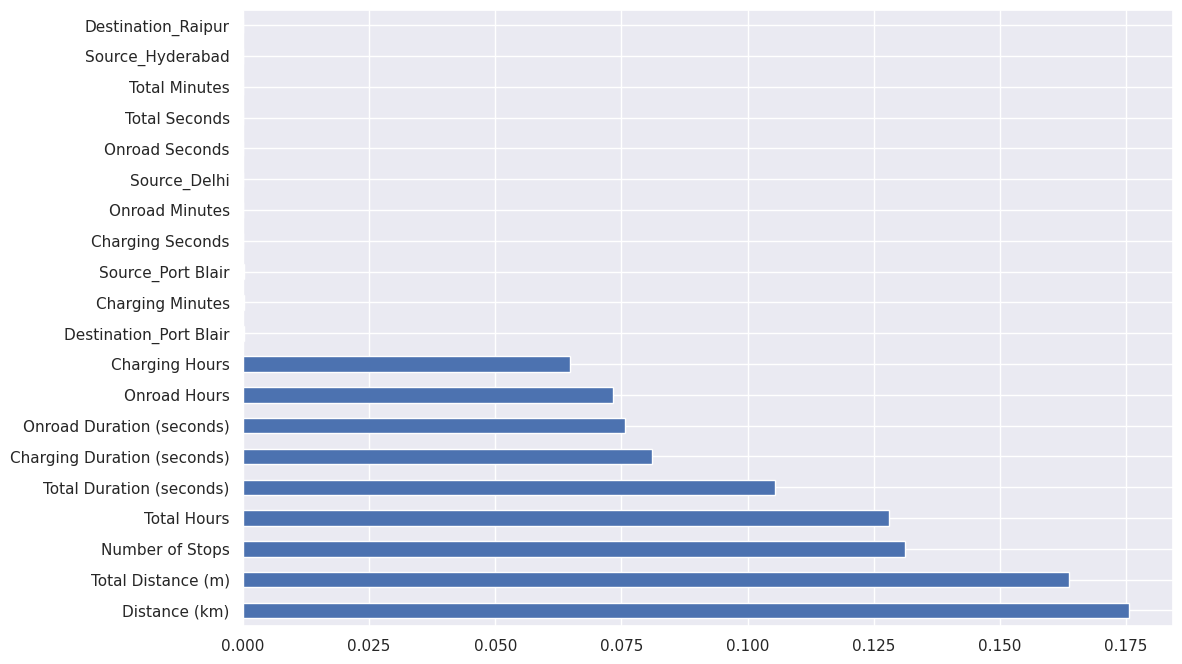

In [28]:
# plotting graph of important features
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

In [29]:
# 60% Train - 20% Val - 20% Test

X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.25)

In [30]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_val, y_val)}')
    print("MAE:" , metrics.mean_absolute_error(y_val,model.predict(X_val)))
    print("MSE:" , metrics.mean_squared_error(y_val,model.predict(X_val)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,model.predict(X_val))))

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 1.0
Val score 1.0
MAE: 2.029446286047203e-09
MSE: 7.504971388244369e-18
RMSE: 2.739520284327964e-09


In [32]:
for degree in [1,2,3]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(X_train, y_train)
    print("-"*20)
    print("Degree", degree)
    get_metrics(poly)

--------------------
Degree 1
Train score 1.0
Val score 1.0
MAE: 7.175521239293309e-09
MSE: 8.47728521653469e-17
RMSE: 9.207217395356042e-09
--------------------
Degree 2
Train score 0.9999999994063622
Val score 0.9313781473662982
MAE: 297.52225616481303
MSE: 477412.27464248566
RMSE: 690.9502692976432
--------------------
Degree 3
Train score 0.9999996982710383
Val score -44.03583862973104
MAE: 6664.793170988602
MSE: 313320922.3513787
RMSE: 17700.873491197508


In [33]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
get_metrics(lasso_model)

Train score 0.9999993506819225
Val score 0.9999992198371088
MAE: 1.906370047801501
MSE: 5.427707445318803
RMSE: 2.3297440729227756


In [34]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
get_metrics(ridge_model)

Train score 0.9999998756796311
Val score 0.999999762305216
MAE: 1.0168138549700951
MSE: 1.6536774092130881
RMSE: 1.2859538907803374


In [35]:
EN_model = ElasticNet(alpha=1)
EN_model.fit(X_train, y_train)
EN_model.score(X_val, y_val)
get_metrics(EN_model)

Train score 0.999239888123416
Val score 0.999051415442252
MAE: 66.24588830761961
MSE: 6599.441635925755
RMSE: 81.23694748035376


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.734e+06, tolerance: 2.745e+05
  model = cd_fast.enet_coordinate_descent(


In [36]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
get_metrics(rf)

Train score 0.9994743167507096
Val score 0.9967810929384048
MAE: 71.64317787610628
MSE: 22394.40765818416
RMSE: 149.6476116020037


In [37]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [38]:
# function to get metrics for scaled features
def scaled_metrics(model):
    print(f'Train score {model.score(X_train_scaled, y_train)}')
    print(f'Val score {model.score(X_val_scaled, y_val)}')
    print("MAE:" , metrics.mean_absolute_error(y_val,model.predict(X_val_scaled)))
    print("MSE:" , metrics.mean_squared_error(y_val,model.predict(X_val_scaled)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,model.predict(X_val_scaled))))


## Baseline: Linear Regression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
score = lr.score(X_val_scaled, y_val)
print("LR")
scaled_metrics(lr)
print("-"*50)

## Polynomial

for degree in [1,2,3]:
    poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly.fit(X_train, y_train)
    print("Polynomial - Degree", degree)
    scaled_metrics(poly)
    print("-"*50)

## Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
print("Lasso")
scaled_metrics(lasso_model)
print("-"*50)

## Ridge

ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
print("Ridge")
scaled_metrics(ridge_model)
print("-"*50)

## ElasticNet

EN_model = ElasticNet(alpha=1)
EN_model.fit(X_train_scaled, y_train)
EN_model.score(X_val_scaled, y_val)
print("ElasticNet")
scaled_metrics(EN_model)
print("-"*50)

## Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print("Random Forest")
scaled_metrics(rf)

LR
Train score 1.0
Val score 0.9999638759406682
MAE: 2.1570744261347645
MSE: 251.32036913966658
RMSE: 15.853087053935791
--------------------------------------------------
Polynomial - Degree 1
Train score -1.4719136378406064
Val score -1.585632485664164
MAE: 3463.3461728824363
MSE: 17988623.72544259
RMSE: 4241.299768401496
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Polynomial - Degree 2
Train score -1.6197559205945153
Val score -1.7015273616684636
MAE: 3440.730599593814
MSE: 18794921.344190467
RMSE: 4335.310985868311
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Polynomial - Degree 3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Train score -1.6222085517205396


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Val score -1.7047624111797757


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


MAE: 3443.875956396085


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


MSE: 18817428.0572345


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


RMSE: 4337.905953018633
--------------------------------------------------
Lasso
Train score 0.999999220398707
Val score 0.9999990173303425
MAE: 2.1304191114804407
MSE: 6.836576664986018
RMSE: 2.6146848117863115
--------------------------------------------------
Ridge
Train score 0.9998207720676117
Val score 0.9994632062608051
MAE: 46.38487056740982
MSE: 3734.5526272925476
RMSE: 61.110986142366805
--------------------------------------------------
ElasticNet
Train score 0.9910267082433907
Val score 0.9880647115441907
MAE: 232.06389768932974
MSE: 83035.54904904518
RMSE: 288.15889548831416
--------------------------------------------------
Random Forest
Train score -1.4522370927685522
Val score -1.552032728020087
MAE: 3347.422544336283
MSE: 17754865.2926891
RMSE: 4213.652251039364


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [39]:
# retraining the random forest model on train + val, and scoring on test

X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

rf = RandomForestRegressor()
rf.fit(X_train_val,y_train_val)

print(f'Train score {rf.score(X_train_val, y_train_val)}')
print(f'Test score {rf.score(X_test, y_test)}')
print("MAE:" , metrics.mean_absolute_error(y_test,rf.predict(X_test)))
print("MSE:" , metrics.mean_squared_error(y_test,rf.predict(X_test)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,rf.predict(X_test))))

Train score 0.9995764092823528
Test score 0.9989015529676646
MAE: 53.990731858406974
MSE: 8552.780768818619
RMSE: 92.481245497769


In [40]:
y_train_val_pred = rf.predict(X_train_val)
y_test_pred = rf.predict(X_test)

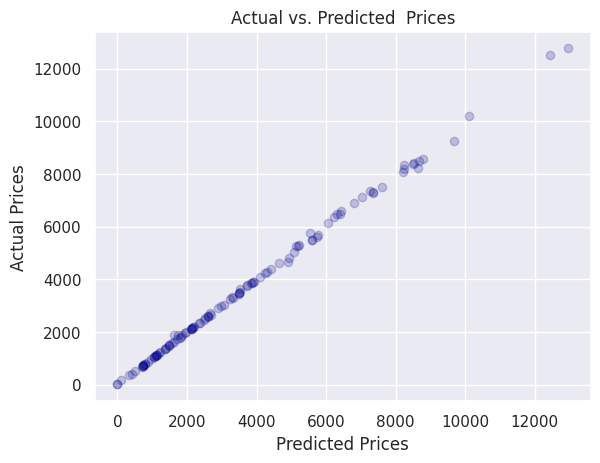

In [42]:
plt.scatter(y_test,y_test_pred,alpha =0.2,color="DarkBlue")
plt.title('Actual vs. Predicted  Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices');

In [43]:
# randomized search CV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [44]:
# create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [45]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, n_jobs = 1)


In [46]:
rf_random.fit(X_train_val,y_train_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   2.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   2.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=700; total time=   2.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1100; total time=   1.6s
[CV] END max_depth=10

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=400; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1000; total time=   2.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   3.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   3.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   3.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   1.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=200; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [48]:
prediction = rf_random.predict(X_test)

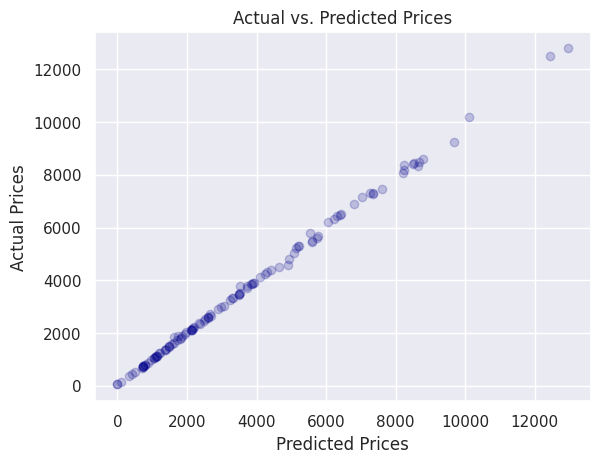

In [50]:
plt.scatter(y_test,prediction,alpha =0.2,color="DarkBlue")
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices');

In [51]:
print("MAE:" , metrics.mean_absolute_error(y_test,prediction))
print("MSE:" , metrics.mean_squared_error(y_test,prediction))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 55.37773242988401
MSE: 8785.683855784946
RMSE: 93.73197883211975


In [52]:
test_df = pd.DataFrame({
    "Predicted Price" : rf.predict(X_test),
    "Actual Price" : y_test,
}).reset_index(drop = True)

test_df

Predicted Price  Actual Price
0         2132.20021      2110.846
1         1492.95633      1488.026
2         2527.20504      2526.718
3         8322.68343      8244.640
4         6468.02441      6402.498
..               ...           ...
108       1038.56944      1040.524
109       4819.07051      4936.052
110       1213.84870      1205.838
111        506.43278       493.341
112       3290.15907      3309.674

[113 rows x 2 columns]

In [53]:
# save the model
file = open('rf_prediction.pkl', 'wb')
pkl.dump(rf, file)

In [56]:
# open the model
model = open('rf_prediction.pkl','rb')
rf_flight_prediction = pkl.load(model)

In [57]:
print(f'R2 score {metrics.r2_score(y_test,rf_flight_prediction.predict(X_test))}')
print("MAE:" , metrics.mean_absolute_error(y_test,rf_flight_prediction.predict(X_test)))
print("MSE:" , metrics.mean_squared_error(y_test,rf_flight_prediction.predict(X_test)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,rf_flight_prediction.predict(X_test))))

R2 score 0.9989015529676646
MAE: 53.990731858406974
MSE: 8552.780768818619
RMSE: 92.481245497769
